In [3]:
!pip3 install pandas
!pip3 install scipy
!pip3 install seaborn

You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns



/Users/lelele/Desktop


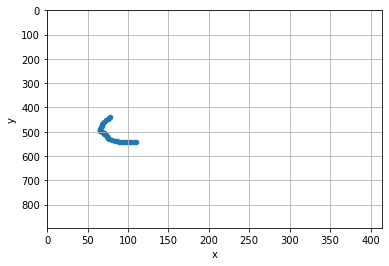

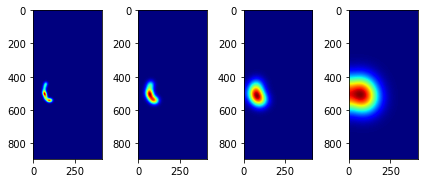

In [17]:
basePath = os.path.dirname(os.path.abspath("__file__"))
print(basePath)
df = pd.read_json (basePath + '/reading_data2.json')
x = df["x"]
y = df["y"]

at = df.plot.scatter(x="x", y="y", grid=True)
at.set_xlim(0, 414)
at.set_ylim(0, 896)
at.invert_yaxis()

def myplot(x, y, s, bins=[414,896]):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[0, 414], [0, 896]])
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

fig, axs = plt.subplots(1, 4)
sigmas = [8, 16, 32, 64]

for ax, s in zip(axs.flatten(), sigmas):
    img, extent = myplot(x, y, s)        
    ax.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    ax.invert_yaxis()

fig.tight_layout()

plt.show()